# Nonlinear analysis -Assignment 1

21.09.2023 - Laure Toullier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import math

np.set_printoptions(precision=3, suppress=True)

Params = plt.rcParams
Params['figure.figsize'] = (14, 7) 

### Exercise 1

In [2]:
# Element connectivity 
connectivity = np.array([[1, 2], [2, 3]])

# Unit stiffness matrix of bar in local coordinate system
K_unit = np.array([[1, 0, -1, 0], 
                   [0, 0,  0, 0], 
                   [-1, 0, 1, 0], 
                   [0, 0, 0, 0]])

# Input data and element stiffness matrices
E = 200e3  # N/mm^2

a=3000  #m
b=4000  #m


In [3]:
#Load
P = 150*10**3 #N
theta = 30 #°

Px=P*np.cos(np.radians(theta)) #N
Py=P*np.sin(np.radians(theta)) #N

print(Px,Py)

129903.8105676658 74999.99999999999


Bar 1

In [4]:
A1 = 10000 #mm²
L1 = np.sqrt(a**2+b**2) #mm

theta1 = np.arctan(b/a)
c = np.cos(theta1)
s = np.sin(theta1)

#Transformation matrix
T = np.array([[c, s, 0, 0], 
              [-s, c, 0, 0], 
              [0, 0, c, s], 
              [0, 0, -s, c]])

k1 = E*A1/L1
k1_global = k1 * T.T @ K_unit @ T

print(k1_global)

[[ 144000.  192000. -144000. -192000.]
 [ 192000.  256000. -192000. -256000.]
 [-144000. -192000.  144000.  192000.]
 [-192000. -256000.  192000.  256000.]]


Bar 2

In [5]:
A2 = 15000 #mm²
L2 = np.sqrt(a**2+b**2) #mm

theta2 = -np.arctan(b/a)
c = np.cos(theta2)
s = np.sin(theta2)

#Transformation matrix
T = np.array([[c, s, 0, 0], 
              [-s, c, 0, 0], 
              [0, 0, c, s], 
              [0, 0, -s, c]])

k2 = E*A2/L2
k2_global = k2 * T.T @ K_unit @ T

print(k2_global)

[[ 216000. -288000. -216000.  288000.]
 [-288000.  384000.  288000. -384000.]
 [-216000.  288000.  216000. -288000.]
 [ 288000. -384000. -288000.  384000.]]


Stiffness matrix in global system

In [6]:
# Assemble global stiffness matrix
NDoF = 6
K_global = np.zeros((NDoF, NDoF))
K_element_6DOF = []

# Assemble 1st element
K1_global = np.zeros((NDoF, NDoF))
K1_global[0:4, 0:4] = k1_global[0:4, 0:4]

# Assemble 2nd element
K2_global = np.zeros((NDoF, NDoF))
K2_global[2:6, 2:6] = k2_global[0:4,0:4]

#Stiffness matrix of the entire system: K=K1+K2
K_global=K1_global+K2_global

print(K_global)

[[ 144000.  192000. -144000. -192000.       0.       0.]
 [ 192000.  256000. -192000. -256000.       0.       0.]
 [-144000. -192000.  360000.  -96000. -216000.  288000.]
 [-192000. -256000.  -96000.  640000.  288000. -384000.]
 [      0.       0. -216000.  288000.  216000. -288000.]
 [      0.       0.  288000. -384000. -288000.  384000.]]


Equilibrium of system : KU=R

Condensation of system

In [7]:
#Joints displacements
F_red = np.array([Px, Py]) # N
K_red = K_global[2:4, 2:4]
u_red = np.linalg.inv(K_red) @ F_red
print(u_red)

[0.408 0.178]


In [8]:
#Support reactions @node 1 and 3
u_vec = np.array([0, 0, u_red[0], u_red[1],0,0])
F = K_global @ u_vec #N

F1=K_global[0:6,2:4]@u_red

print(F)

[ -93076.905 -124102.54   129903.811   75000.     -36826.905   49102.54 ]


In [9]:
#Axial forces in each bar

#bar 1:



F1=K1_global@u_vec
F2=K2_global@u_vec

""""""""""""""""""""""""""""""""""""""


''

### Exercise 2

#### Geometry

In [10]:
#Geometric data for the truss:
DDL=7  #degree of freedom
a=3000 #mm
b=4000 #mm

In [11]:
#Load definition
load=150*10**3 #N 
P=np.zeros(2*DDL).reshape(DDL,2)
theta_P=-90 #°

P[1]=[load*np.cos(np.radians(theta_P)),load*np.sin(np.radians(theta_P))]
P[3]=[load*np.cos(np.radians(theta_P)),load*np.sin(np.radians(theta_P))]
P[5]=[load*np.cos(np.radians(theta_P)),load*np.sin(np.radians(theta_P))]

In [12]:
#Generate the nodes of the truss and their location (if 1st node at (0,0))

nodes=np.zeros(DDL*2).reshape(DDL,2)

for i in range(DDL):
    nodes[i,0]=a*i
    if i%2==0:
        nodes[i,1]=0
    else:
        nodes[i,1]=b

print(nodes)

[[    0.     0.]
 [ 3000.  4000.]
 [ 6000.     0.]
 [ 9000.  4000.]
 [12000.     0.]
 [15000.  4000.]
 [18000.     0.]]


In [13]:
#Connectivity: connect nodes with bar element

connectivity=[]

for i in range(DDL):
    if i<(DDL-2):
        connectivity.append([i+1, i+2])
        connectivity.append([i+1, i+3])
    if i==DDL-2:
        connectivity.append([i+1, i+2])
        
Connectivity=np.array(connectivity)
    
print(Connectivity)

[[1 2]
 [1 3]
 [2 3]
 [2 4]
 [3 4]
 [3 5]
 [4 5]
 [4 6]
 [5 6]
 [5 7]
 [6 7]]


In [14]:
# Area: area of each bar of the truss

A=10*10**3 #mm²     #members area equal in the entire truss
nb_members=int(np.size(Connectivity)/2)
area=np.zeros(nb_members)

for i in range(np.size(area)):
    area[i]=A
    
area

array([10000., 10000., 10000., 10000., 10000., 10000., 10000., 10000.,
       10000., 10000., 10000.])

In [15]:
#Length of each bar element of the truss, from points' coordinates of each bar.

length=[]

for i in range(nb_members):
    x1=nodes[Connectivity[i,0]-1,0]      #For each node at the end of each bar, we get its location in x and y.
    y1=nodes[Connectivity[i,0]-1,1]
    x2=nodes[Connectivity[i,1]-1,0]
    y2=nodes[Connectivity[i,1]-1,1]
    
    x=x2-x1
    y=y2-y1
    length.append(np.sqrt(x**2+y**2))

length

[5000.0,
 6000.0,
 5000.0,
 6000.0,
 5000.0,
 6000.0,
 5000.0,
 6000.0,
 5000.0,
 6000.0,
 5000.0]

#### Stiffness

In [16]:
#Local stiffness matrix for each bar element of the truss

k_local=E*area/length
k_local

array([400000.   , 333333.333, 400000.   , 333333.333, 400000.   ,
       333333.333, 400000.   , 333333.333, 400000.   , 333333.333,
       400000.   ])

In [17]:
# Unit stiffness matrix of bar in local coordinate system
K_unit = np.array([[1, 0, -1, 0], 
                   [0, 0,  0, 0], 
                   [-1, 0, 1, 0], 
                   [0, 0, 0, 0]])

In [18]:
#Stiffness matrix for each bar in global coordinates

angles=[]

for i in range(nb_members):
        
    x1=nodes[Connectivity[i,0]-1,0]      #For each node at the extremity of each bar, we get its location in x and y.
    y1=nodes[Connectivity[i,0]-1,1]
    x2=nodes[Connectivity[i,1]-1,0]
    y2=nodes[Connectivity[i,1]-1,1]
    
    if np.isclose(y1, y2):
        if np.isclose(x1, x2):
            angles.append(90)
        else:
            angles.append(0)
    else:
        theta=np.arcsin((y2-y1)/length[i]) #calculate the angle between the x-axis and the bar element
        angles.append(math.degrees(theta))
    
print(angles)


[53.13010235415599, 0, -53.13010235415599, 0, 53.13010235415599, 0, -53.13010235415599, 0, 53.13010235415599, 0, -53.13010235415599]


In [19]:
#Transformation matrix for each bar element of the truss

c=[]
s=[]

for i in range(nb_members):
    c.append(np.cos(np.radians(angles[i])))
    s.append(np.sin(np.radians(angles[i])))
    
T=np.zeros((nb_members,4,4))

for i in range(nb_members):
    T[i,0,0]=c[i]
    T[i,0,1]=s[i]
    T[i,1,0]=-s[i]
    T[i,1,1]=c[i]
    T[i,2,2]=c[i]
    T[i,2,3]=s[i]
    T[i,3,2]=-s[i]
    T[i,3,3]=c[i]

T

array([[[ 0.6,  0.8,  0. ,  0. ],
        [-0.8,  0.6,  0. ,  0. ],
        [ 0. ,  0. ,  0.6,  0.8],
        [ 0. ,  0. , -0.8,  0.6]],

       [[ 1. ,  0. ,  0. ,  0. ],
        [-0. ,  1. ,  0. ,  0. ],
        [ 0. ,  0. ,  1. ,  0. ],
        [ 0. ,  0. , -0. ,  1. ]],

       [[ 0.6, -0.8,  0. ,  0. ],
        [ 0.8,  0.6,  0. ,  0. ],
        [ 0. ,  0. ,  0.6, -0.8],
        [ 0. ,  0. ,  0.8,  0.6]],

       [[ 1. ,  0. ,  0. ,  0. ],
        [-0. ,  1. ,  0. ,  0. ],
        [ 0. ,  0. ,  1. ,  0. ],
        [ 0. ,  0. , -0. ,  1. ]],

       [[ 0.6,  0.8,  0. ,  0. ],
        [-0.8,  0.6,  0. ,  0. ],
        [ 0. ,  0. ,  0.6,  0.8],
        [ 0. ,  0. , -0.8,  0.6]],

       [[ 1. ,  0. ,  0. ,  0. ],
        [-0. ,  1. ,  0. ,  0. ],
        [ 0. ,  0. ,  1. ,  0. ],
        [ 0. ,  0. , -0. ,  1. ]],

       [[ 0.6, -0.8,  0. ,  0. ],
        [ 0.8,  0.6,  0. ,  0. ],
        [ 0. ,  0. ,  0.6, -0.8],
        [ 0. ,  0. ,  0.8,  0.6]],

       [[ 1. ,  0. ,  0. ,  0. ],


In [20]:
#Stiffness for each bar in global coordinates system

k_global=[]

for i in range(nb_members):
    k=k_local[i]*T[i].T@K_unit@T[i]
    k_global.append(k)

print(k_global)

[array([[ 144000.,  192000., -144000., -192000.],
       [ 192000.,  256000., -192000., -256000.],
       [-144000., -192000.,  144000.,  192000.],
       [-192000., -256000.,  192000.,  256000.]]), array([[ 333333.333,       0.   , -333333.333,       0.   ],
       [      0.   ,       0.   ,       0.   ,       0.   ],
       [-333333.333,       0.   ,  333333.333,       0.   ],
       [      0.   ,       0.   ,       0.   ,       0.   ]]), array([[ 144000., -192000., -144000.,  192000.],
       [-192000.,  256000.,  192000., -256000.],
       [-144000.,  192000.,  144000., -192000.],
       [ 192000., -256000., -192000.,  256000.]]), array([[ 333333.333,       0.   , -333333.333,       0.   ],
       [      0.   ,       0.   ,       0.   ,       0.   ],
       [-333333.333,       0.   ,  333333.333,       0.   ],
       [      0.   ,       0.   ,       0.   ,       0.   ]]), array([[ 144000.,  192000., -144000., -192000.],
       [ 192000.,  256000., -192000., -256000.],
       [-1440

In [21]:
#Stiffness in global system

K_globalCS_bar=np.zeros((nb_members, DDL*2,DDL*2))
K_global=np.zeros((DDL*2,DDL*2))
k_global = np.array(k_global)

for i, c in enumerate(Connectivity):       
    #we build all the global stiffness matrix for each bar in the entire system and sum them.
    u, v = c
    K_global[2*u-2:2*u,2*u-2:2*u] += k_global[i, 0:2, 0:2]
    K_global[2*u-2:2*u,2*v-2:2*v] += k_global[i, 0:2, 2:4]
    K_global[2*v-2:2*v,2*u-2:2*u] += k_global[i, 2:4, 0:2]
    K_global[2*v-2:2*v,2*v-2:2*v] += k_global[i, 2:4, 2:4]
    
    K_globalCS_bar[i, 2*u-2:2*u,2*u-2:2*u] = k_global[i, 0:2, 0:2]
    K_globalCS_bar[i, 2*u-2:2*u,2*v-2:2*v] = k_global[i, 0:2, 2:4]
    K_globalCS_bar[i, 2*v-2:2*v,2*u-2:2*u] = k_global[i, 2:4, 0:2]
    K_globalCS_bar[i, 2*v-2:2*v,2*v-2:2*v] = k_global[i, 2:4, 2:4]

print(K_global.shape)
print(K_global)

(14, 14)
[[ 477333.333  192000.    -144000.    -192000.    -333333.333       0.
        0.          0.          0.          0.          0.          0.
        0.          0.   ]
 [ 192000.     256000.    -192000.    -256000.          0.          0.
        0.          0.          0.          0.          0.          0.
        0.          0.   ]
 [-144000.    -192000.     621333.333       0.    -144000.     192000.
  -333333.333       0.          0.          0.          0.          0.
        0.          0.   ]
 [-192000.    -256000.          0.     512000.     192000.    -256000.
        0.          0.          0.          0.          0.          0.
        0.          0.   ]
 [-333333.333       0.    -144000.     192000.     954666.667       0.
  -144000.    -192000.    -333333.333       0.          0.          0.
        0.          0.   ]
 [      0.          0.     192000.    -256000.          0.     512000.
  -192000.    -256000.          0.          0.          0.          0.
    

Equilibrium of the entire system : K*U=R

In [22]:
#List of nodes with a load applied on it

nodes_with_load=[]

for i, c in enumerate(P):
    x,y = c
    if x!=0 or y!=0:
        nodes_with_load.append(i)

nodes_with_load=np.array(nodes_with_load)

#Calculate the displacements of the nodes with a load applied
support=[0,7]
F_red=np.zeros(DDL*2-2*len(support))


for i in range(DDL):
    if i in nodes_with_load:
        F_red[i*2-2]=P[i,0]
        F_red[i*2-1]=P[i,1]  
        
a=2*(DDL-len(support)) 
K_red=np.zeros((a,a))
K_red=K_global[2:a+2, 2:a+2]

u_red=np.linalg.inv(K_red)@F_red

u_vec=np.zeros(DDL*2)
u_vec[2:DDL*2-2]=u_red[:]

print(u_vec)


[ 0.     0.     0.675 -1.385 -0.113 -2.269 -0.    -2.646  0.112 -2.269
 -0.675 -1.385  0.     0.   ]


In [23]:
#Support reactions
F = K_global @ u_vec #N
print(F)

[ 206250.  225000.      -0. -150000.       0.       0.       0. -150000.
      -0.       0.       0. -150000. -206250.  225000.]


In [24]:
#Axial forces in each bar of the truss

F_bar=[]
F_bar_reduced=np.zeros((nb_members,4))
F_local_CS=[]
axial_load=[]

for i in range(nb_members):
    F_bar.append(K_globalCS_bar[i,:,:]@u_vec)    
F_bar=np.array(F_bar)

for i in range(nb_members):
    index_1=Connectivity[i,0]
    index_2=Connectivity[i,1]
    F_bar_reduced[i,0]=F_bar[i,(index_1-1)*2]
    F_bar_reduced[i,1]=F_bar[i,(index_1)*2-1]
    F_bar_reduced[i,2]=F_bar[i,(index_2-1)*2]
    F_bar_reduced[i,3]=F_bar[i,index_2*2-1]     

for i in range(nb_members):
    F_local_CS.append(T[i]@F_bar_reduced[i])   
F_local_CS=np.array(F_local_CS)

for i in range(nb_members):
    axial_load.append(F_local_CS[i,2])
    
axial_load=np.array(axial_load)
print(axial_load)

[-281250.  -37500.   93750. -225000.  -93750.   75000.  -93750. -225000.
   93750.  -37500. -281250.]


[[0.0, 3000.0], [0.0, 6000.0], [3000.0, 6000.0], [3000.0, 9000.0], [6000.0, 9000.0], [6000.0, 12000.0], [9000.0, 12000.0], [9000.0, 15000.0], [12000.0, 15000.0], [12000.0, 18000.0], [15000.0, 18000.0]]


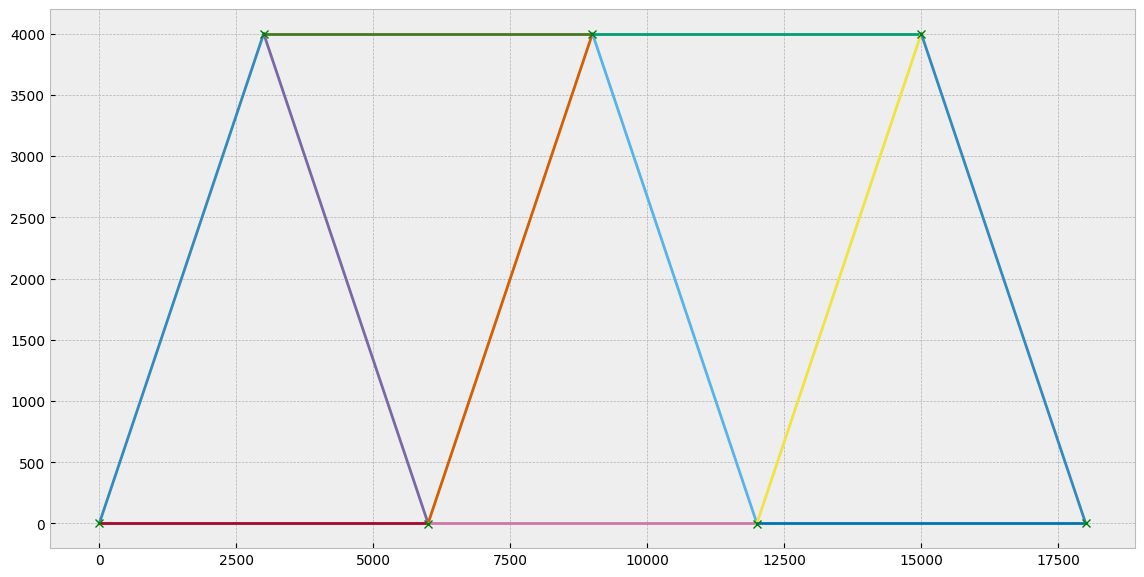

In [25]:
#Conclusion - Results

#Drawing of the truss:
nodes_x=[]
nodes_y=[]

for i in range(DDL):
    nodes_x.append(nodes[i,0])
    nodes_y.append(nodes[i,1])
    

x=np.linspace(0,18000,3000)

nodes_xx=[]
nodes_yy=[]

for i in range(nb_members):
    x1=nodes[Connectivity[i,0]-1,0]
    x2=nodes[Connectivity[i,1]-1,0]
    y1=nodes[Connectivity[i,0]-1,1]
    y2=nodes[Connectivity[i,1]-1,1]
    nodes_xx.append([x1,x2])
    nodes_yy.append([y1,y2])

print(nodes_xx)

for i in range(nb_members):
#    plt.annotate(f"{axial_load[i]}", ((nodes_xx[i,1]-nodes_xx[i,0])/2,(nodes_yy[i,1]-nodes_yy[i,0])/2 ))
    plt.plot(nodes_xx[i],nodes_yy[i])


u_vec_array=u_vec.reshape((DDL,2))
nodes_displ=nodes+u_vec_array

nodes_displ_x=[]
nodes_displ_y=[]

for i in range(DDL):
    nodes_displ_x.append(nodes_displ[i,0])
    nodes_displ_y.append(nodes_displ[i,1])

plt.plot(nodes_displ_x,nodes_displ_y,'x', label='displaced_truss', color='Green')


[[    0.  3000.]
 [    0.  6000.]
 [ 3000.  6000.]
 [ 3000.  9000.]
 [ 6000.  9000.]
 [ 6000. 12000.]
 [ 9000. 12000.]
 [ 9000. 15000.]
 [12000. 15000.]
 [12000. 18000.]
 [15000. 18000.]]


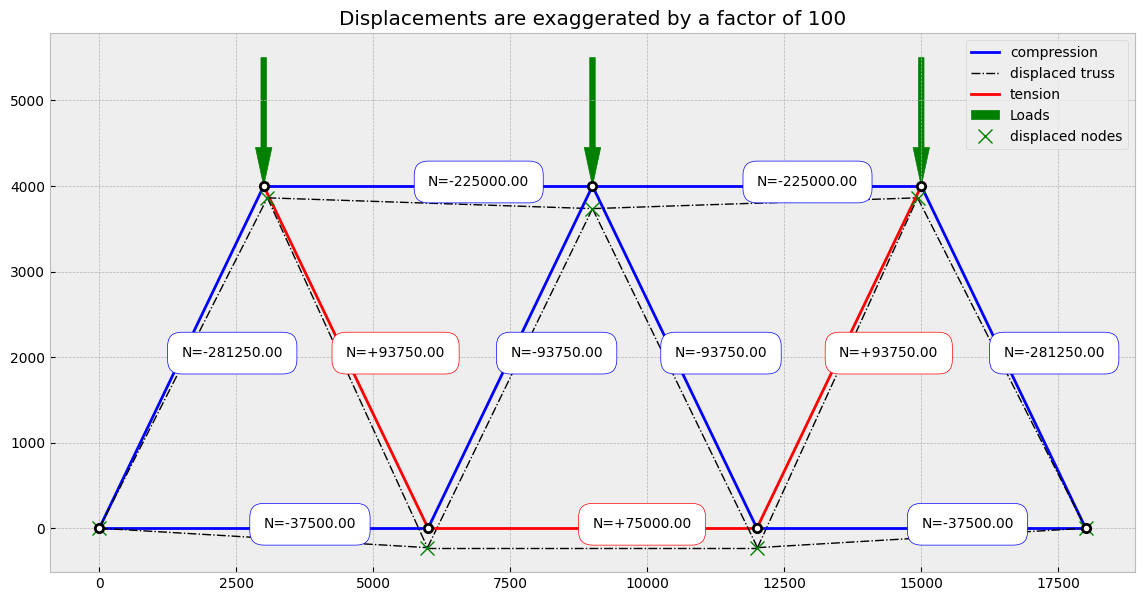

In [31]:
#Conclusion - Results

#Drawing of the truss:
nodes_x=[]
nodes_y=[]

for i in range(DDL):
    nodes_x.append(nodes[i,0])
    nodes_y.append(nodes[i,1])
    

x=np.linspace(0,18000,3000)

nodes_xx=[]
nodes_yy=[]

for u, v in Connectivity:
    x1=nodes[u-1,0]
    x2=nodes[v-1,0]
    y1=nodes[u-1,1]
    y2=nodes[v-1,1]
    nodes_xx.append([x1,x2])
    nodes_yy.append([y1,y2])
nodes_xx = np.array(nodes_xx)
nodes_yy = np.array(nodes_yy)


# Déplacements
u_vec_array=u_vec.reshape((DDL,2))
f = 100
nodes_displ = nodes + u_vec_array
nodes_displ_exaggerated = nodes + u_vec_array * f

nodes_displ_x=[]
nodes_displ_y=[]
for dispx, dispy in nodes_displ:
    nodes_displ_x.append(dispx)
    nodes_displ_y.append(dispy)

nodes_displ_x_ex=[]
nodes_displ_y_ex=[]
for u, v in Connectivity:
    x1=nodes_displ_exaggerated[u-1,0]
    x2=nodes_displ_exaggerated[v-1,0]
    y1=nodes_displ_exaggerated[u-1,1]
    y2=nodes_displ_exaggerated[v-1,1]
    nodes_displ_x_ex.append([x1,x2])
    nodes_displ_y_ex.append([y1,y2])

print(nodes_xx)

compression_label=False
tension_label=False
displaced_label=False
for nx, ny, dx, dy, axload in zip(nodes_xx, nodes_yy, nodes_displ_x_ex, nodes_displ_y_ex, axial_load):

    # Pour la légende
    if axload > 0:
        color='red'
        label='tension' if tension_label is False else None
        tension_label=True
    else:
        color='blue'
        label='compression' if compression_label is False else None
        compression_label=True

    plt.text(
        x=nx.mean(),
        y=ny.mean(),
        s=f"N={axload:+.2f}",  # :.2f veut dire deux chiffres après la virgule
        bbox=dict(facecolor='white', edgecolor=color, boxstyle='round, pad=1') # optionnel, elève ça si tu veux
    )
    
    # barres
    plt.plot(nx, ny, color=color, linewidth=2, label=label)

    # barres déplacées
    plt.plot(dx, dy, '-.', color='k', linewidth=1, label='displaced truss' if displaced_label is False else None)
    displaced_label = True
    plt.title(f"Displacements are exaggerated by a factor of {f:.0f}")

# Forces
force_label = False
for (nx, ny), (px, py) in zip(nodes, P):
    facteur = 0.01
    plt.arrow(
        x=nx - px*facteur,
        y=ny - py*facteur,
        dx=px*facteur,
        dy=py*facteur,
        color='green', width=100,
        length_includes_head=True,
        label='Loads' if force_label is False else None
    )
    force_label = True

# noeuds déplacés
plt.plot(*nodes_displ_exaggerated.T, 'x', markersize=10, label='displaced nodes', color='Green')  # je pense que tu peux l'enlever
# articulations
plt.plot(*nodes.T, 'o', mfc='w', mew=2, mec='k')

plt.legend()